In [4]:
old = []
with open('vedomosti_urls3.txt') as f:
    old = f.readlines()
with open('vedomosti_urls.txt', 'a+') as f:
    for i in old[24344:]:
        f.write(i)

In [2]:
old = []
with open('vedomosti_urls2.txt') as f:
    old = f.readlines()
len(old)

61997

In [1]:
from bs4 import BeautifulSoup
import json
import os
import sqlite3
import nltk
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pymystem3 import Mystem
import pickle
import re

In [2]:
conn = sqlite3.connect('D:\diplom main\diplom.db')
cur = conn.cursor()

In [5]:
df = pd.read_sql("""SELECT * FROM VEDOMOSTI_TEXTS0021""", conn)
conn.close()

In [6]:
pattern = re.compile('[^a-zA-Z0-9а-яА-ЯёЁ\s]+')
stopwords_rus = nltk.corpus.stopwords.words('russian')

def text_cleaner(text):
    clean_text = ' '.join(list(filter(None, [i.strip() for i in re.sub(pattern, ' ', text).lower().split(' ') if i not in stopwords_rus])))
    out = ' '.join([i for i in Mystem().lemmatize(clean_text) if i not in (' ', '\n')])
    return out
def count_democracy(text):
    return text.count('демократия')

In [7]:
df['TOKENIZED_TRANSCRIPT'] = df['TRANSCRIPT'].apply(text_cleaner)


KeyboardInterrupt



In [ ]:
df["COUNT_DEMOCRACY"] = df['TOKENIZED_TRANSCRIPT'].apply(count_democracy)

In [ ]:
df.to_csv("vedomosti.csv")

In [ ]:
conn = sqlite3.connect('D:\diplom main\diplom.db')
df.to_sql("VEDOMOSTI_TOKENIZED", conn)
conn.commit()


In [ ]:
conn.close()

In [77]:
conn.commit()

In [4]:
res = cur.execute("SELECT * FROM VEDOMOSTI_TRANSCRIPTS;")

In [5]:
df = pd.read_sql("SELECT * FROM VEDOMOSTI_TRANSCRIPTS;", conn)

In [6]:
df.head()

,ID,AUTHOR,DDATE,URL,HEADER,SECTION,FILENAME,TRANSCRIPT
0,1,Антон Олейник,2016-06-23T20:19:47+00:00,https://www.vedomosti.ru/opinion/articles/2016...,Социолог <b>Антон Олейник</b> о разной роли во...,Мнения,100.html,Слово «волонтер» в российском случае пока не с...
1,2,Павел Аптекарь,2019-12-18T21:50:31+00:00,https://www.vedomosti.ru/opinion/articles/2019...,Если власть не готова разговаривать по делу с ...,Мнения,1000.html,Отчет мэра Москвы Сергея Собянина перед Мосгор...
2,3,Дмитрий Казьмин,2011-10-25T20:11:01+00:00,https://www.vedomosti.ru/opinion/articles/2011...,,Мнения,10000.html,"Столько людей, или 31% всего российского элект..."
3,4,Лилия Бирюкова,2011-06-28T16:04:03+00:00,https://www.vedomosti.ru/politics/articles/201...,Внести такую инициативу депутатов побудили дел...,Политика,10001.html,Депутаты всех четырех думских фракций внесли н...
4,5,Наталья Райбман,2015-01-23T06:02:01+00:00,https://www.vedomosti.ru/politics/articles/201...,,Политика,10002.html,По автобусной остановке на улице Куприна в Дон...


In [8]:
df['DATETIME'] = pd.to_datetime(df['DDATE'], errors='coerce', utc=True).dt.tz_localize(None)
df['DDATE'] = pd.to_datetime(df['DATETIME']).dt.date

In [12]:
df0021 = df[(df['DDATE'] >= datetime.date(2000,1,1)) & (df['DDATE'] <= datetime.date(2021,9,16))]

In [13]:
df0021

,ID,AUTHOR,DDATE,URL,HEADER,SECTION,FILENAME,TRANSCRIPT,DATETIME
0,1,Антон Олейник,2016-06-23,https://www.vedomosti.ru/opinion/articles/2016...,Социолог <b>Антон Олейник</b> о разной роли во...,Мнения,100.html,Слово «волонтер» в российском случае пока не с...,2016-06-23 20:19:47
1,2,Павел Аптекарь,2019-12-18,https://www.vedomosti.ru/opinion/articles/2019...,Если власть не готова разговаривать по делу с ...,Мнения,1000.html,Отчет мэра Москвы Сергея Собянина перед Мосгор...,2019-12-18 21:50:31
2,3,Дмитрий Казьмин,2011-10-25,https://www.vedomosti.ru/opinion/articles/2011...,,Мнения,10000.html,"Столько людей, или 31% всего российского элект...",2011-10-25 20:11:01
3,4,Лилия Бирюкова,2011-06-28,https://www.vedomosti.ru/politics/articles/201...,Внести такую инициативу депутатов побудили дел...,Политика,10001.html,Депутаты всех четырех думских фракций внесли н...,2011-06-28 16:04:03
4,5,Наталья Райбман,2015-01-23,https://www.vedomosti.ru/politics/articles/201...,,Политика,10002.html,По автобусной остановке на улице Куприна в Дон...,2015-01-23 06:02:01
...,...,...,...,...,...,...,...,...,...
52122,52123,Мария Железнова,2016-06-22,https://www.vedomosti.ru/opinion/articles/2016...,Какой сигнал несет региональным властям увольн...,Мнения,9993.html,Новый ЦИК под председательством Эллы Памфилово...,2016-06-22 22:11:24
52123,52124,Ольга Чуракова,2017-12-22,https://www.vedomosti.ru/politics/articles/201...,Партия проводит первый день съезда,Политика,9994.html,На закрытой встрече с секретарями региональных...,2017-12-22 13:06:20
52124,52125,Наталья Райбман,2017-06-26,https://www.vedomosti.ru/politics/articles/201...,Спецслужба сказала свое слово в споре Роскомна...,Политика,9995.html,"ФСБ заявила, что члены международных террорист...",2017-06-26 05:43:01
52125,52126,Анастасия Агамалова,2015-04-03,https://www.vedomosti.ru/politics/articles/201...,"Второй самописец зафиксировал, что при снижени...",Политика,9996.html,Расшифровка данных второго бортового самописца...,2015-04-03 09:57:12


In [15]:
df0021 = df0021.reset_index(drop=True)

In [24]:
cur.execute("DROP TABLE VEDOMOSTI_TEXTS0021;")

In [23]:
df0021.to_sql("VEDOMOSTI_TEXTS0021", conn)

DatabaseError: database disk image is malformed

In [85]:
# res.fetchone()

In [55]:
os.chdir("E:\diplom\web pages")

In [56]:
os.chdir("vedomosti2")

In [57]:
def filename():
    for root, dirs, files in os.walk(os.getcwd()):
        for name in files:
            yield name

In [58]:
errors = []
err_files = []

In [86]:
for file in filename():
    with open(file, encoding='utf-8') as f:
        try:
            html = f.read()
            soup = BeautifulSoup(html)
            author = json.loads(soup.find(type="application/ld+json").text)['author'][0]['name'].replace("'", '.') if json.loads(soup.find(type="application/ld+json").text)['author'][0] else ''
            date = json.loads(soup.find(type="application/ld+json").text)['datePublished'].replace("'", '.') if soup.find(type="application/ld+json").text else ''
            url = json.loads(soup.find(type="application/ld+json").text)['url'].replace("'", '.') if soup.find(type="application/ld+json").text else ''
            try: 
                header = json.loads(soup.find(type="application/ld+json").text)['description'].replace("'", '.')
            except:
                header = ''
            try: 
                section = json.loads(soup.find(type="application/ld+json").text)['articleSection'].replace("'", '.')
            except:
                section = ''    
            text = ''
            for i in soup.findAll(class_="box-paragraph__text"):
                text += i.text.strip().replace("'", '.') + '\n'
            cur.execute(f"""INSERT INTO VEDOMOSTI_TRANSCRIPTS VALUES('{author}', '{date}', '{url}', '{header}', '{section}', '{file}', '{text}');""")
            # conn.commit()
        except Exception as e:
            print(file)
            print(e)
            errors.append(e)
            err_files.append(file)
            

10475.html
'NoneType' object has no attribute 'text'
3998.html
'NoneType' object has no attribute 'text'
4779.html
'NoneType' object has no attribute 'text'


In [87]:
conn.commit()

In [88]:
conn.close()

In [ ]:
for file in err_files:
    with open(file, encoding='utf-8') as f:
        try:
            html = f.read()
            soup = BeautifulSoup(html)
            author = json.loads(soup.find(type="application/ld+json").text)['author'][0]['name'].replace("'", '.') if json.loads(soup.find(type="application/ld+json").text)['author'][0] else ''
            date = json.loads(soup.find(type="application/ld+json").text)['datePublished'].replace("'", '.') if soup.find(type="application/ld+json").text else ''
            url = json.loads(soup.find(type="application/ld+json").text)['url'].replace("'", '.') if soup.find(type="application/ld+json").text else ''
            try: 
                header = soup.find(property="og:title").attrs['content']
            except:
                header = ''
            try: 
                section = json.loads(soup.find(type="application/ld+json").text)['articleSection'].replace("'", '.')
            except:
                section = ''    
            text = ''
            for i in soup.findAll(class_="box-paragraph__text"):
                text += i.text.strip().replace("'", '.') + '\n'
            cur.execute(f"""INSERT INTO VEDOMOSTI_TRANSCRIPTS VALUES('{author}', '{date}', '{url}', '{header}', '{section}', '{file}', '{text}');""")
            conn.commit()
        except Exception as e:
            print(file)
            print(e)
            errors.append(e)
            err_files.append(file)
            

In [29]:
with open('13003.html', encoding='utf-8') as f:
    html = f.read()
    soup = BeautifulSoup(html)

In [30]:
print(soup.prettify())

<!DOCTYPE html>
<html data-head-attrs="" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <link href="https://cdn10.vedomosti.ru/1.6.101/favicon.ico" rel="icon"/>
  <base target="_self"/>
  <meta content="width=device-width, initial-scale=1, user-scalable=no, minimum-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="#fdf6f2" name="theme-color"/>
  <meta content="max-image-preview:large" name="robots"/>
  <meta content="/browserconfig.xml" name="msapplication-config"/>
  <meta content="5UKfplA2CDg7gtsOuVFb6QPtKINUJzM-11wPEzqubM8" name="google-site-verification"/>
  <meta content="0ab706171d17cb81" name="yandex-verification"/>
  <meta content="Ведомости" data-hid="apple-mobile-web-app-title" name="apple-mobile-web-app-title"/>
  <meta content="yes" data-hid="mobile-web-app-capable" name="mobile-web-app-capable"/>
  <meta content="summary_large_image" data-hid="twitter:card" name="twitter:card"/>
  <meta content="@vedomosti" data-hid="twitter:site" name="twitter:site"/>
  <meta c

In [23]:
with open('14436.html', encoding='utf-8') as f:
    html = f.read()
    soup = BeautifulSoup(html)

In [34]:
soup.find(property="og:title").attrs['content']

'Профильный комитет Госдумы утвердил второй пакет поправок к Конституции'

In [27]:
print(soup.prettify())

<!DOCTYPE html>
<html data-head-attrs="" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <link href="https://cdn10.vedomosti.ru/1.6.101/favicon.ico" rel="icon"/>
  <base target="_self"/>
  <meta content="width=device-width, initial-scale=1, user-scalable=no, minimum-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="#fdf6f2" name="theme-color"/>
  <meta content="max-image-preview:large" name="robots"/>
  <meta content="/browserconfig.xml" name="msapplication-config"/>
  <meta content="5UKfplA2CDg7gtsOuVFb6QPtKINUJzM-11wPEzqubM8" name="google-site-verification"/>
  <meta content="0ab706171d17cb81" name="yandex-verification"/>
  <meta content="Ведомости" data-hid="apple-mobile-web-app-title" name="apple-mobile-web-app-title"/>
  <meta content="yes" data-hid="mobile-web-app-capable" name="mobile-web-app-capable"/>
  <meta content="summary_large_image" data-hid="twitter:card" name="twitter:card"/>
  <meta content="@vedomosti" data-hid="twitter:site" name="twitter:site"/>
  <meta c

In [ ]:
for file in err_files:
    with open(file, encoding='utf-8') as f:
        try:
            html = f.read()
            soup = BeautifulSoup(html)
            author = json.loads(soup.find(type="application/ld+json").text)['author'][0]['name'].replace("'", '.') if json.loads(soup.find(type="application/ld+json").text)['author'][0] else ''
            date = json.loads(soup.find(type="application/ld+json").text)['datePublished'].replace("'", '.') if soup.find(type="application/ld+json").text else ''
            url = json.loads(soup.find(type="application/ld+json").text)['url'].replace("'", '.') if soup.find(type="application/ld+json").text else ''
            try: 
                header = json.loads(soup.find(type="application/ld+json").text)['description'].replace("'", '.')
            except:
                header = ''
            try: 
                section = json.loads(soup.find(type="application/ld+json").text)['articleSection'].replace("'", '.')
            except:
                section = ''    
            text = ''
            for i in soup.findAll(class_="box-paragraph__text"):
                text += i.text.strip().replace("'", '.') + '\n'
            cur.execute(f"""INSERT INTO VEDOMOSTI_TRANSCRIPTS VALUES('{author}', '{date}', '{url}', '{header}', '{section}', '{file}', '{text}');""")
            conn.commit()
        except Exception as e:
            print(file)
            print(e)
            errors.append(e)
            err_files.append(file)
            

In [35]:
conn.close()

In [14]:
with open('10017.html', encoding='utf-8') as f:
        html = f.read()
        soup = BeautifulSoup(html)

In [16]:
json.loads(soup.find(type="application/ld+json").text)

{'@context': 'https://schema.org',
 '@type': 'NewsArticle',
 'name': 'От редакции: Дым отечества',
 'headline': 'От редакции: Дым отечества',
 'description': '',
 'url': 'https://www.vedomosti.ru/opinion/articles/2006/04/17/ot-redakcii-dym-otechestva',
 'articleSection': 'Мнения',
 'datePublished': '2006-04-16T20:00:00+00:00',
 'dateModified': '2006-04-16T20:00:00+00:00',
 'author': [{}],
 'mainEntityOfPage': {'@type': 'WebPage',
  '@id': 'https://www.vedomosti.ru/opinion/articles/2006/04/17/ot-redakcii-dym-otechestva'},
 'image': None,
 'publisher': {'@type': 'Organization',
  'name': 'Ведомости',
  'logo': {'@type': 'ImageObject',
   'url': 'https://cdn5.vedomosti.ru/image/2016/logo1.png',
   'width': 248,
   'height': 60}}}

In [6]:
from bs4 import BeautifulSoup
with open('24330.html', encoding='utf-8') as f:
    html = f.read()
    soup = BeautifulSoup(html)

<!DOCTYPE html>
<html data-head-attrs="" lang="ru">
 <head>
  <meta charset="utf-8"/>
  <link href="https://cdn10.vedomosti.ru/1.6.102/favicon.ico" rel="icon"/>
  <base target="_self"/>
  <meta content="width=device-width, initial-scale=1, user-scalable=no, minimum-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="#fdf6f2" name="theme-color"/>
  <meta content="max-image-preview:large" name="robots"/>
  <meta content="/browserconfig.xml" name="msapplication-config"/>
  <meta content="5UKfplA2CDg7gtsOuVFb6QPtKINUJzM-11wPEzqubM8" name="google-site-verification"/>
  <meta content="0ab706171d17cb81" name="yandex-verification"/>
  <meta content="Ведомости" data-hid="apple-mobile-web-app-title" name="apple-mobile-web-app-title"/>
  <meta content="yes" data-hid="mobile-web-app-capable" name="mobile-web-app-capable"/>
  <meta content="summary_large_image" data-hid="twitter:card" name="twitter:card"/>
  <meta content="@vedomosti" data-hid="twitter:site" name="twitter:site"/>
  <meta c
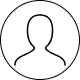

In [7]:
print(soup.prettify())

In [35]:
author = json.loads(soup.find(type="application/ld+json").text)['author'][0]['name']
author

'Владимир Сидорович'

In [40]:
date = json.loads(soup.find(type="application/ld+json").text)['datePublished']
date

'2016-09-25T20:49:45+00:00'

In [42]:
url = json.loads(soup.find(type="application/ld+json").text)['url']
url

'https://www.vedomosti.ru/opinion/articles/2016/09/26/658434-elektricheskaya-tsivilizatsiya'

In [43]:
header = json.loads(soup.find(type="application/ld+json").text)[ 'description']
header 

'Экономист <b>Владимир Сидорович</b> о новой структуре производства и потребления энергии'

In [44]:
section = json.loads(soup.find(type="application/ld+json").text)['articleSection']
section 

'Мнения'

In [58]:
text = ''
for i in soup.findAll(class_="box-paragraph__text"):
    text += i.text.strip() + '\n'
text

'Наша цивилизация – цивилизация электроэнергии. Прирученное электричество, будучи недоступным для большинства землян еще столетие назад, за короткий срок преобразовало планету и образ жизни людей до неузнаваемости.\nДоля электроэнергии в мировом энергетическом балансе неуклонно растет. Если в 1973 г., по данным Международного энергетического агентства (МЭА), она составляла 9% конечного потребления энергии человечеством, то сегодня достигла 18%. Перспективы электроэнергии не вызывают сомнений. Будут возрастать как объемы ее производства, так и доля в глобальном конечном потреблении энергии. Электричество теснит углеводородное топливо и на транспорте, и в сфере производства тепла. Перефразируя персонажа оскароносного фильма, «будет одно сплошное электричество».\nМЭА предполагает, что электричество к 2050 г. займет первое место по доле в глобальном потреблении энергии (23–26%). По прогнозу Statoil, доля электроэнергии к 2040 г. может вырасти до 24–27%. На европейском рынке, в рамках сцена

In [8]:
# cur.execute("""CREATE TABLE VEDOMOSTI_TRANSCRIPTS_COPY (
# ID integer primary key autoincrement,
# 	AUTHOR VARCHAR(200),
#     DDATE VARCHAR(200),
#     URL VARCHAR(200),
# 	HEADER VARCHAR(200),
# 	SECTION VARCHAR(200),
# 	FILENAME VARCHAR(20),
# 	TRANSCRIPT TEXT
# );""")
# cur.execute("""INSERT INTO VEDOMOSTI_TRANSCRIPTS_COPY(AUTHOR, DDATE, URL, HEADER, SECTION, FILENAME, TRANSCRIPT) SELECT * FROM VEDOMOSTI_TRANSCRIPTS""")


In [9]:
# cur.execute("""DROP TABLE VEDOMOSTI_TRANSCRIPTS;""")
# cur.execute('alter table VEDOMOSTI_TRANSCRIPTS_COPY rename to VEDOMOSTI_TRANSCRIPTS')
# conn.commit()

In [14]:
nlp = spacy.load('ru_core_news_sm')

In [17]:


# conn = sqlite3.connect('E:\diplom\diplom.db')
# cur = conn.cursor()
res = cur.execute("""select * from VEDOMOSTI_TRANSCRIPTS""")
def get_texts():
    for r in res:
        yield r

vedomosti_frame = pd.DataFrame(columns=['file', 'date', 'count'])
vedomosti_texts_democracy = []
corpus_vedomosti = []

for row in get_texts():
    i, author, date, url, header, section, file, text = row
    doc = nlp(text)
    democracy_count = 0
    lemmas = [token.lemma_ for token in doc]
    democracy_count = lemmas.count('демократия')
    vedomosti_frame.loc[i] = file, date, democracy_count
    print(democracy_count)
    if democracy_count:
        vedomosti_texts_democracy.append(text)
        corpus_vedomosti.append(lemmas)
print('detected democracy texts')

# ids = list(vedomosti_frame[vedomosti_frame['count']>0].index)
# for index in ids:
#     text = cur.execute(f"""select TRANSCRIPT from VEDOMOSTI_TRANSCRIPTS WHERE ID={index}""").fetchone()
# print('selected democracy texts')

# for text in vedomosti_texts_democracy:
#     doc = nlp(text[0])
# print('model is learning')
model = Word2Vec(corpus_vedomosti, 
                 vector_size=32,      # embedding vector size
                 min_count=5,  # consider words that occured at least 5 times
                 window=5).wv

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
4
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
12
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

In [18]:
model.most_similar('демократия')

[('демократический', 0.7292587757110596),
 ('идея', 0.6934323310852051),
 ('стабильность', 0.6884830594062805),
 ('ценность', 0.6841619610786438),
 ('капитализм', 0.6840871572494507),
 ('общество', 0.6777952313423157),
 ('справедливость', 0.6756701469421387),
 ('авторитаризм', 0.6713219285011292),
 ('народ', 0.6707050800323486),
 ('модернизация', 0.6605098843574524)]

In [19]:
vedomosti_frame.to_excel("vedomosti.xlsx")

In [20]:
conn.close()

In [44]:
conn = sqlite3.connect('E:\diplom\diplom.db', timeout=30)
cur = conn.cursor()

# conn.close()

In [30]:
cur.execute("""select * from VEDOMOSTI_TRANSCRIPTS_COPY""")

OperationalError: database is locked

In [45]:
res = cur.execute("SELECT * from VEDOMOSTI_TRANSCRIPTS")
# conn.commit()

OperationalError: database is locked

In [5]:
# res = cur.execute("SELECT * from VEDOMOSTI_TRANSCRIPTS")
# res.fetchone()

In [36]:
res.fetchone()